# **Modify Schema of a Collection?**

**modify the schema in the users collection and include _id validation:**

# **✅ What this does:**

Updates the users collection (collMod).

Enforces that all documents must include _id, name, email, and address (with nested required fields).

Optional field gender is allowed if it's a string.

Disallows any extra properties (additionalProperties: false).



```
db.runCommand({
  collMod: 'users',
  validator: {
    $jsonSchema: {
      bsonType: 'object',
      required: ['name', 'email', 'address'],
      properties: {
        _id: { bsonType: 'objectId' },
        name: {
          bsonType: 'string',
          description: 'Name is a required field.'
        },
        email: {
          bsonType: 'string',
          description: 'Email is a required field.'
        },
        address: {
          bsonType: 'object',
          description: 'Address is a required field.',
          properties: {
            street: { bsonType: 'string' },
            city: { bsonType: 'string' },
            country: { bsonType: 'string' }
          }
        },
        gender: { bsonType: 'string' }
      },
      additionalProperties: false
    }
  }
})

```





```
db.users.insertOne({
  name: "Ajay Kumar",
  email: "ajay@example.com",
  address: {
    street: "123 Main Street",
    city: "Hyderabad",
    country: "India"
  },
  gender: "Male"
})

```



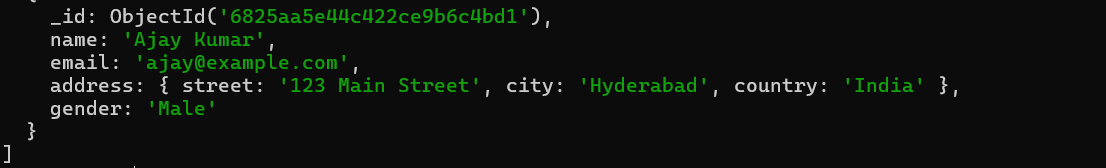

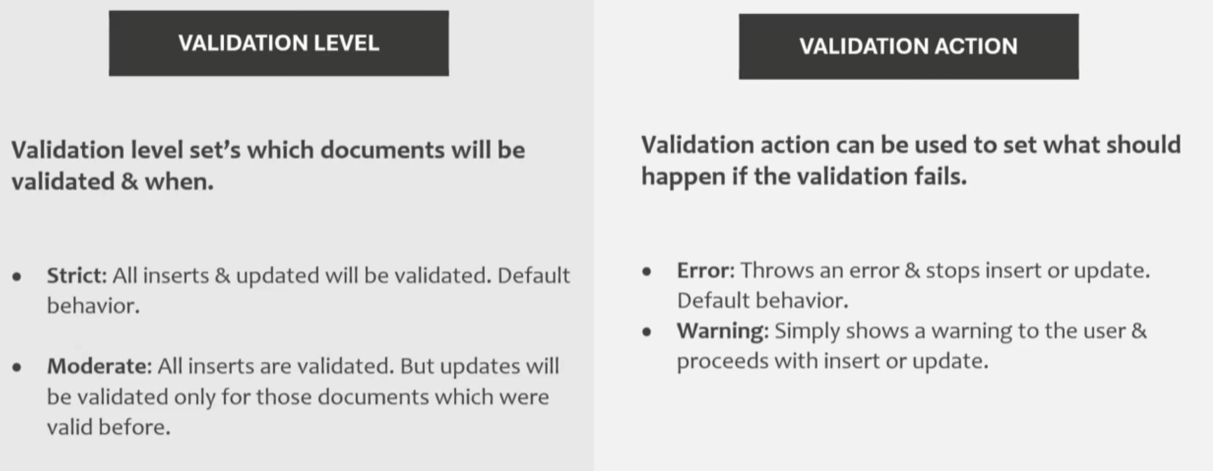

# **🔧 1. validationLevel**
Controls when MongoDB applies the validation rules.

# ✅ Options:
**strict (default):**

Validation applies to all inserts and updates. If a document doesn’t meet the schema, it is subject to the validationAction.

**moderate:**

Validation only applies to:

Inserts

Updates to existing fields

This allows documents with legacy fields (not in the schema) to still exist or be updated partially.

**off:**

Schema validation is disabled.

# **⚠️ 2. validationAction**
Controls what MongoDB does if a document violates the schema.

# ✅ Options:
**warn:**

MongoDB logs a warning but still allows the operation.
Good for transitioning gradually into schema validation.

**error:**

MongoDB rejects the insert or update if it violates the schema.
Enforces strict data integrity.



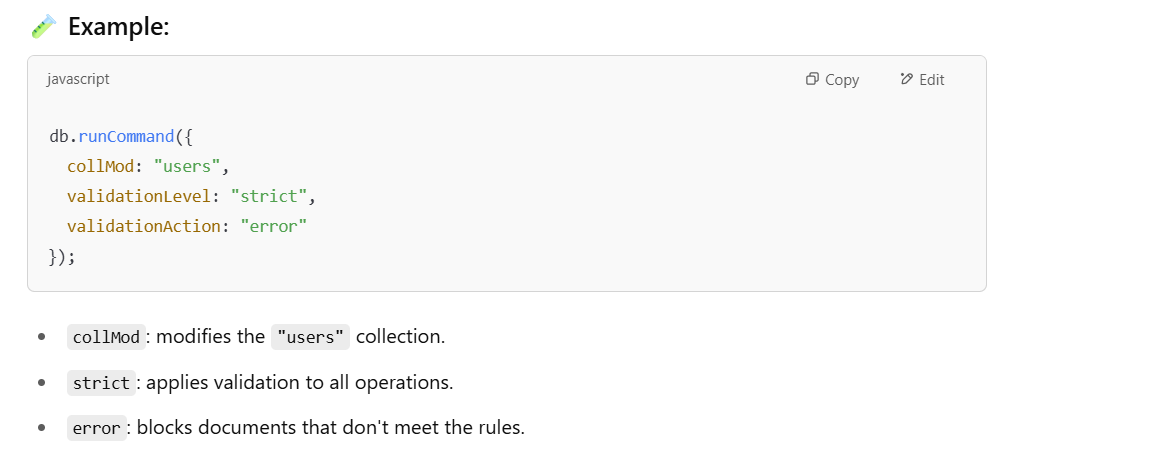

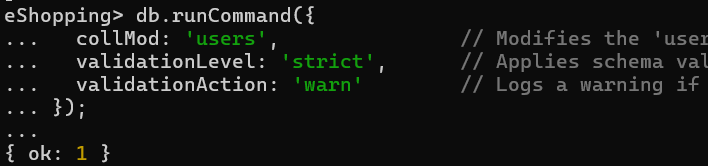

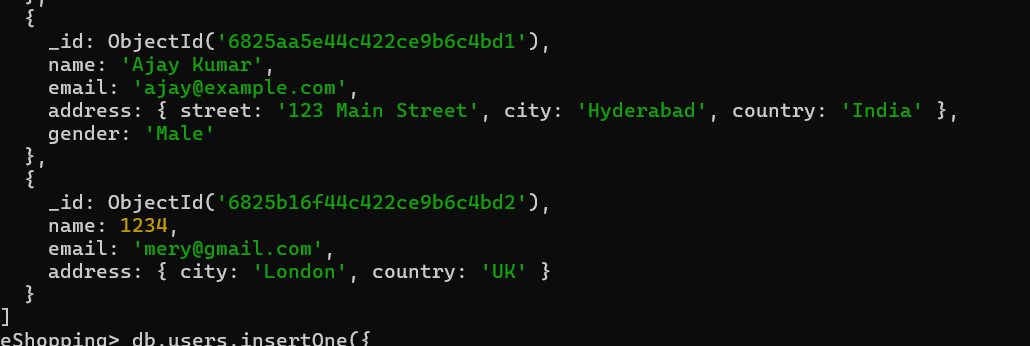

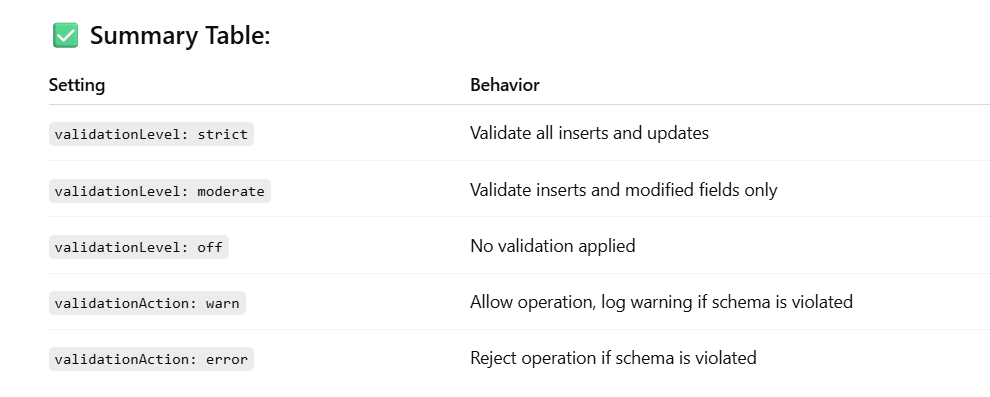